In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from tkinter import font
from turtle import color
from cairo import FontWeight
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

#Loading data
df = pd.read_csv('booking_list_in_vilnius_review_more_than_10.csv', encoding='utf-8')

#Separating date interval
split_dates = df['date'].str.split('-', n=3, expand=True)
df['start_date'] = split_dates[0] + '-' + split_dates[1] + '-' + split_dates[2]
df['end_date'] = split_dates[3].str[:4] + '-' + split_dates[3].str[5:7] + '-' + split_dates[3].str[8:]


#Converting dates to a datetime format
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

#extracting month from 'start date'
df['start_month'] = df['start_date'].dt.month


#creating binary columns for each month from 1 to 12.
for month in range(1, 13):
    df[f'start_month_{month}'] = df['start_month'] == month


#converting price column to numeric value, removing eur symbol and commas
df['price'] = df['price'].replace('[\€,]', '', regex=True)
df['price'] = df['price'].str.replace(' ', '') #removing spaces
df['price'] = pd.to_numeric(df['price'], errors='coerce') #converting to numeric


#convert review quantity to numeric
df['review_quantity'] = pd.to_numeric(df['review_quantity'], errors='coerce')

# Converting score to numeric
df['score'] = df['score'].str.extract(r'(\d+\,\d+)')[0]  # Extracting numeric part with comma
df['score'] = df['score'].str.replace(',', '.').astype(float)  # Replacing comma with dot and converting to float


In [4]:

results = {}
min_prices = []
max_prices = []
mean_prices = []

for month in range(1, 13):
    month_column = f'start_month_{month}'

    #filtered dataframe for records where the current month column is True
    month_data = df[df[month_column]]

    #cheking is the are any data for this month
    if not month_data.empty:
        min_price = month_data['price'].min()
        max_price = month_data['price'].max()
        mean_price = round(month_data['price'].mean(), 2)

        min_prices.append(min_price)
        max_prices.append(max_price)
        mean_prices.append(mean_price)

        #sort by review quantity as MOST POPULAR
        month_data_sorted_by_reviews = month_data.sort_values(by=['review_quantity', 'score'], ascending=False)

        #Find 10 cheapest results
        top_10_cheapest = month_data_sorted_by_reviews.nsmallest(10, 'price')

        #Find 10 most expensive results
        top_10_most_expensive = month_data_sorted_by_reviews.nlargest(10, 'price')

        results[f'Month_{month}'] = {
            'Min Price': min_price,
            'Max Price': max_price,
            'Mean Price': mean_price, 
            'Top 10 Cheapest': top_10_cheapest, 
            'Top 10 Most Expensive': top_10_most_expensive
        }
    else:
        results[f'Month_{month}'] = {
            'Min Price': None,
            'Max Price': None,
            'Mean Price': None,
            'Top 10 Cheapest': pd.DataFrame(), 
            'Top 10 Most Expensive': pd.DataFrame()
        }



# Convert min_prices, max_prices, and mean_prices to pandas Series for plotting
months = list(range(1, 13))
min_prices = pd.Series(min_prices, index=months)
max_prices = pd.Series(max_prices, index=months)
mean_prices = pd.Series(mean_prices, index=months)

In [5]:
results

{'Month_1': {'Min Price': 41,
  'Max Price': 430,
  'Mean Price': 108.71,
  'Top 10 Cheapest':                                                   title  review_quantity  \
  5817                                  Jimmy Jumps House              308   
  5085  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
  5763  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
  5796  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
  5001                                  Jimmy Jumps House              308   
  5039                                  Jimmy Jumps House              308   
  5075                                  Jimmy Jumps House              308   
  5136                                  Jimmy Jumps House              308   
  5236                                  Jimmy Jumps House              308   
  5273                                  Jimmy Jumps House              308   
  
        price  score                   date  \

In [6]:
# Function to display results
def display_results(month_results):
    for month, data in month_results.items():
        print(f"\n{month}:")
        print(f"Minimum Price: {data['Min Price']}")
        print(f"Maximum Price: {data['Max Price']}")
        print(f"Mean Price: {data['Mean Price']}")

        # Display Top 10 Cheapest Listings
        print("\nTop 10 Cheapest Listings:")
        if not data['Top 10 Cheapest'].empty:
            print(data['Top 10 Cheapest'][['title', 'review_quantity', 'price', 'score', 'start_date']])
        else:
            print("No data available.")

        # Display Top 10 Most Expensive Listings
        print("\nTop 10 Most Expensive Listings:")
        if not data['Top 10 Most Expensive'].empty:
            print(data['Top 10 Most Expensive'][['title', 'review_quantity', 'price', 'score', 'start_date']])
        else:
            print("No data available.")

# Display the results
display_results(results) 





Month_1:
Minimum Price: 41
Maximum Price: 430
Mean Price: 108.71

Top 10 Cheapest Listings:
                                                  title  review_quantity  \
5817                                  Jimmy Jumps House              308   
5085  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
5763  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
5796  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
5001                                  Jimmy Jumps House              308   
5039                                  Jimmy Jumps House              308   
5075                                  Jimmy Jumps House              308   
5136                                  Jimmy Jumps House              308   
5236                                  Jimmy Jumps House              308   
5273                                  Jimmy Jumps House              308   

      price  score start_date  
5817     41    9.6 2025-01-29  
5085  

<Figure size 1400x1200 with 0 Axes>

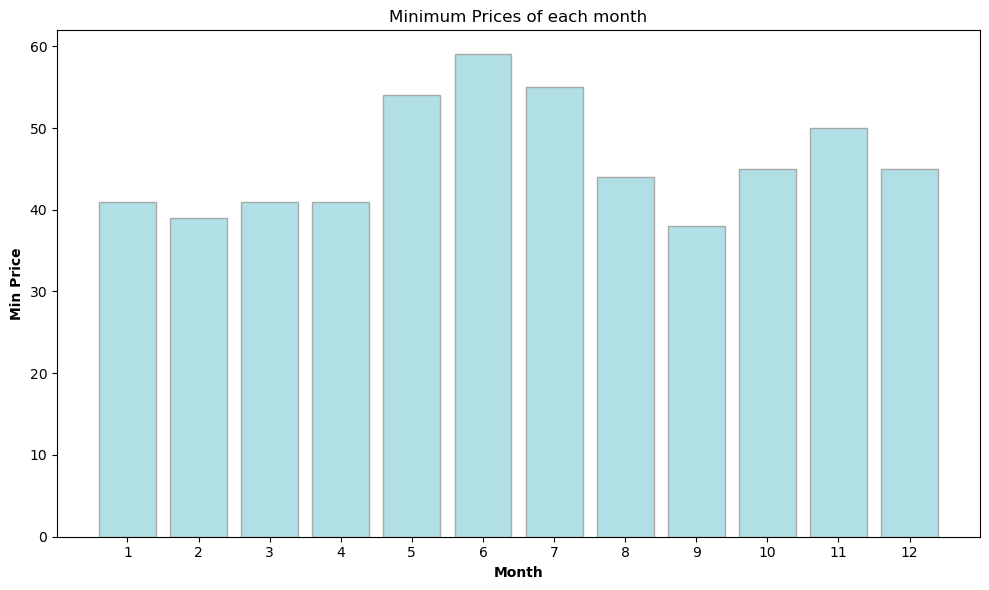

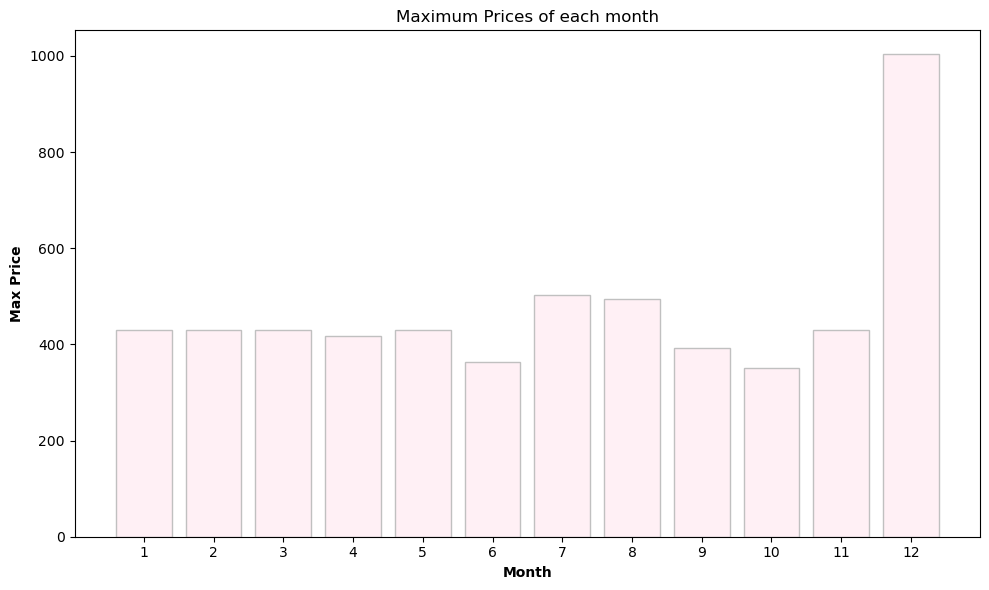

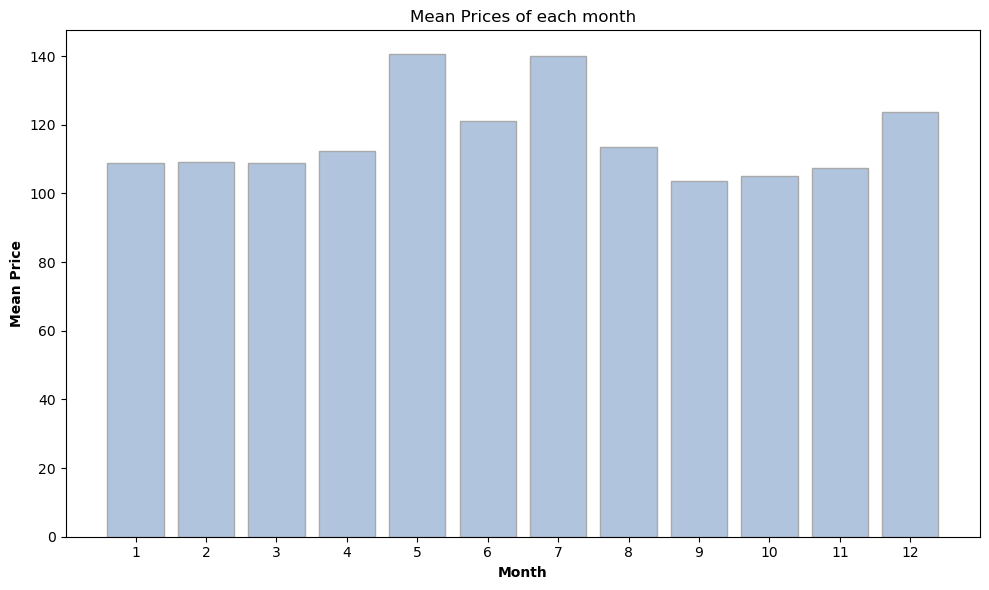

In [7]:
#plotting the histogram
months = list(range(1, 13))

plt.figure(figsize=(14, 12))

#histogram for minimum prices
plt.figure(figsize=(10,6))
plt.bar(months, min_prices, color='powderblue', edgecolor='darkgrey')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Min Price', fontweight='bold')
plt.xticks(months)
plt.title('Minimum Prices of each month')
plt.tight_layout()
plt.show()
# bar_width = 0.35

# Histogram for Maximum Prices
plt.figure(figsize=(10,6))
plt.bar(months, max_prices, color='lavenderblush', edgecolor='silver')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Max Price', fontweight='bold')
plt.xticks(months)
plt.title('Maximum Prices of each month')
plt.tight_layout()
plt.show()

# Histogram for Mean Prices
plt.figure(figsize=(10,6))
plt.bar(months, mean_prices, color='lightsteelblue', edgecolor='darkgrey')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Mean Price', fontweight='bold')
plt.xticks(months)
plt.title('Mean Prices of each month')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='score', ylabel='price'>

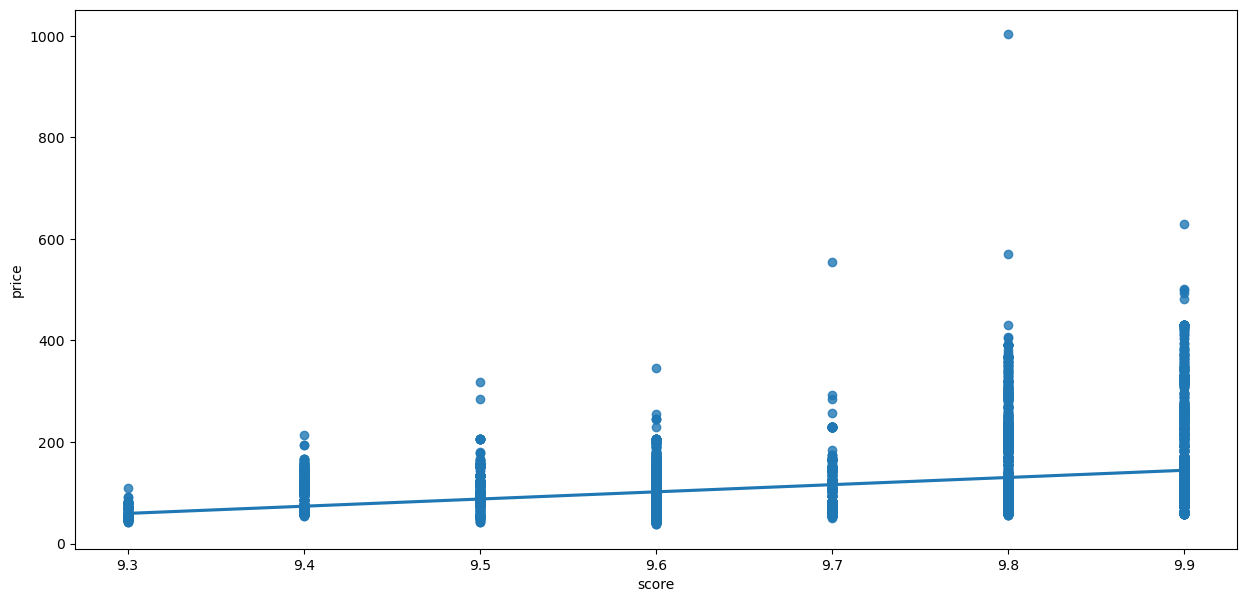

In [8]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x='score', y='price', data= df, ax=ax)

<AxesSubplot:xlabel='review_quantity', ylabel='price'>

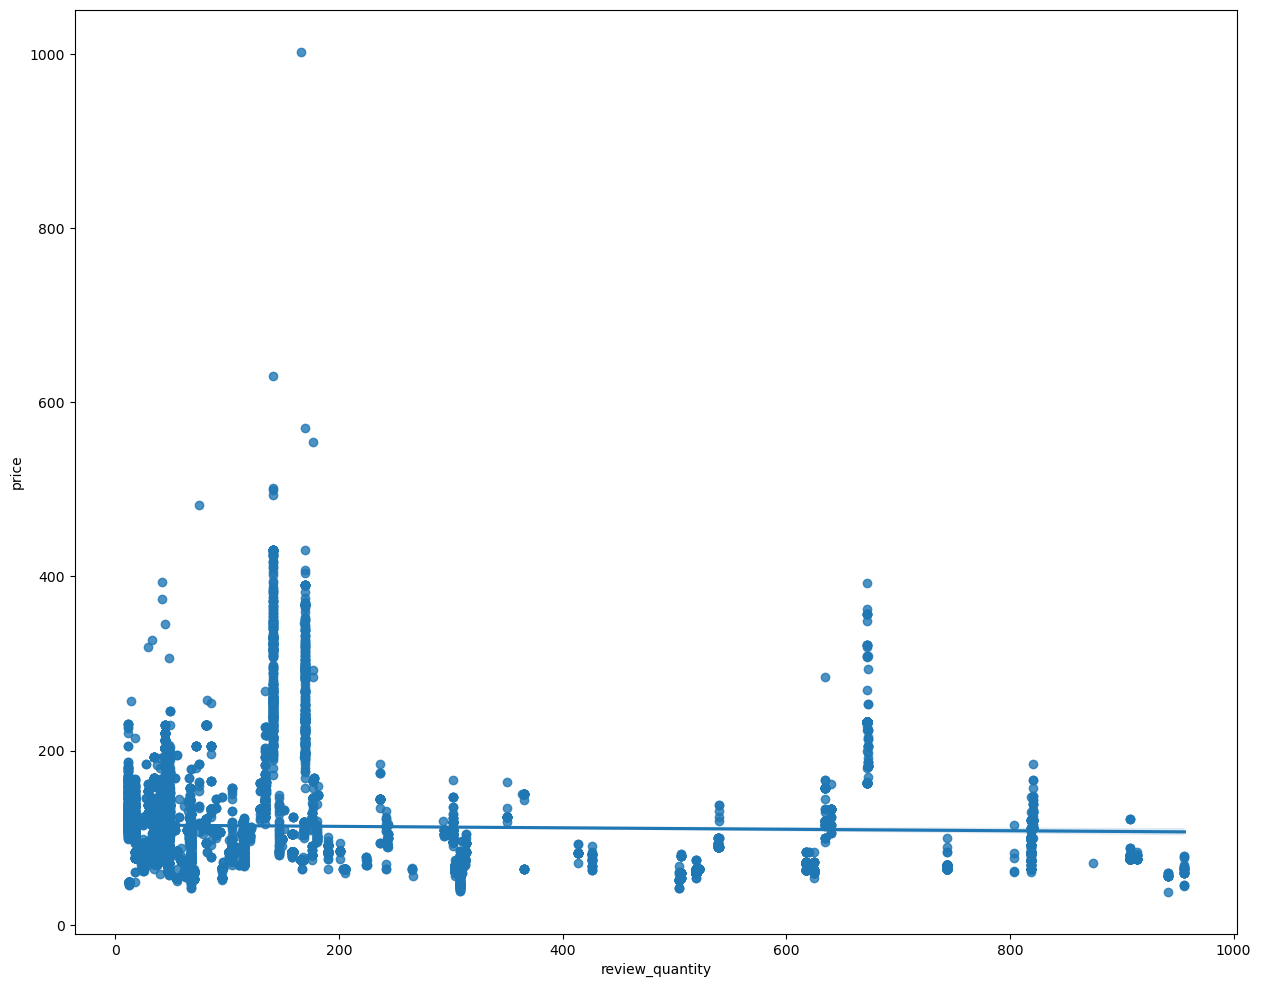

In [9]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.regplot(x='review_quantity', y='price', data= df, ax=ax)

<AxesSubplot:xlabel='score', ylabel='review_quantity'>

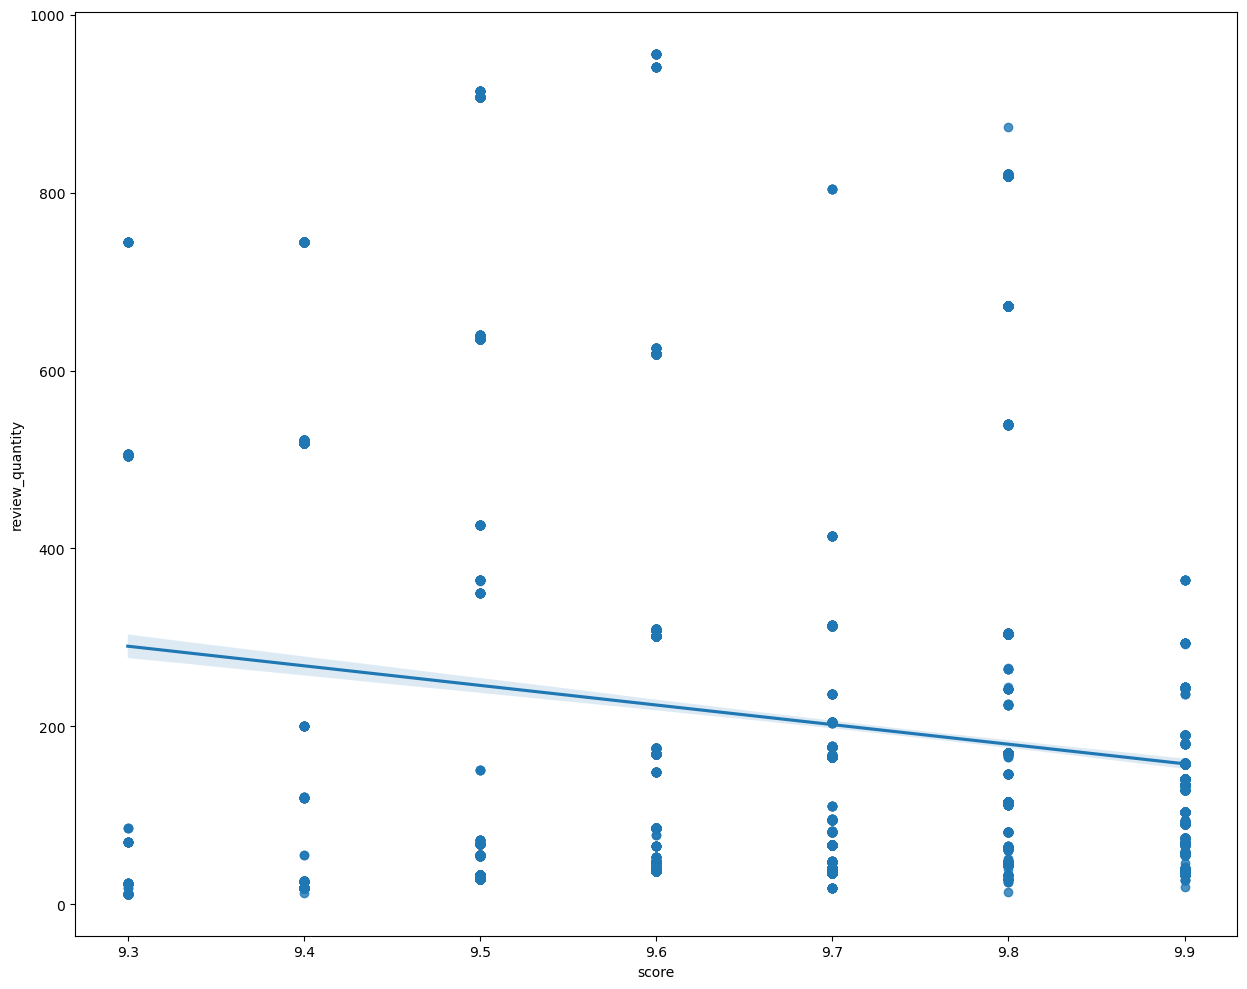

In [10]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.regplot(x='score', y='review_quantity', data= df, ax=ax)

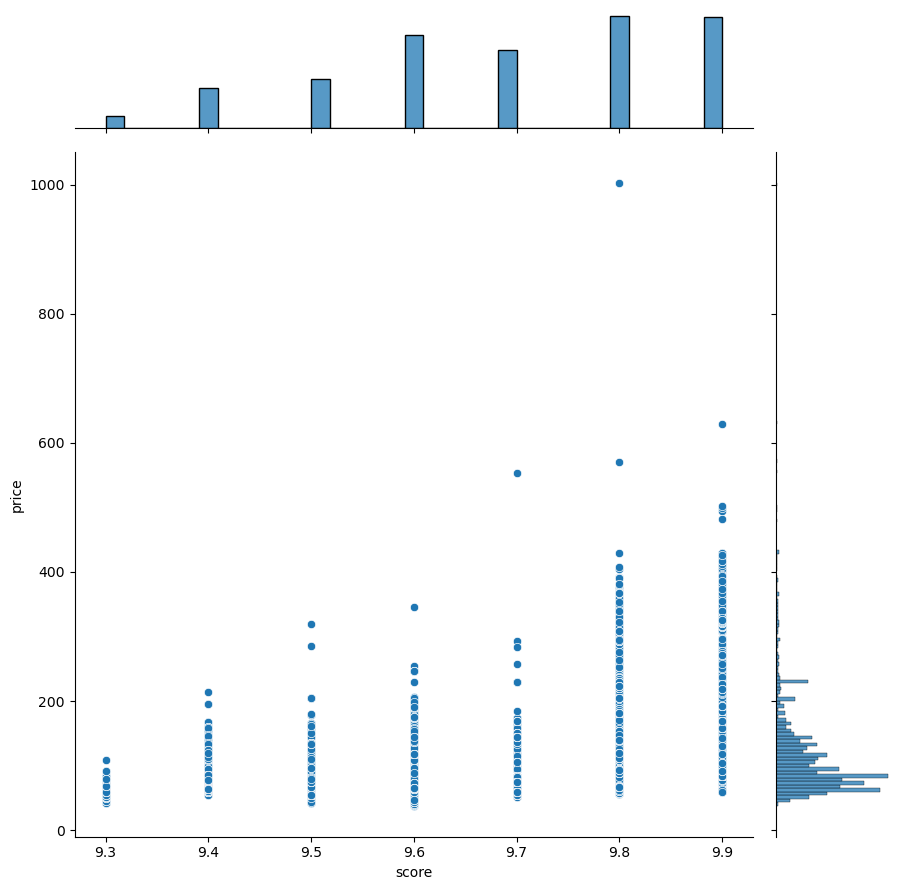

In [11]:
sns.jointplot(x="score", y="price", data=df, height=9)